# Heart Disease EDA

This Heart Disease database and general definition of each feature has been extracted from Kaggle website.

## Attribute Information:

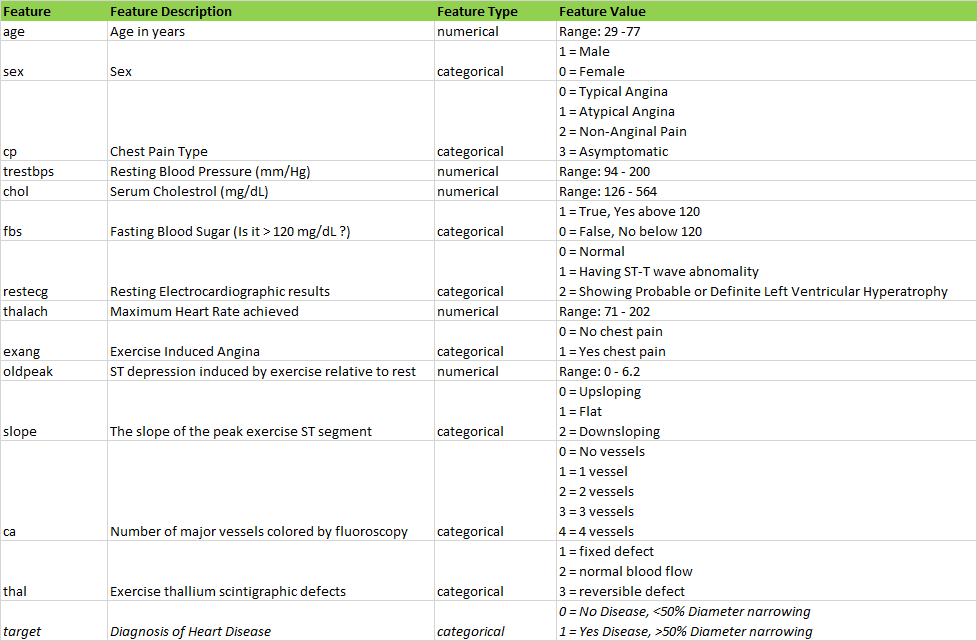

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read file into DataFrame and explore data attributes

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
# Drop rows where thal=0 (since thal=0 maps to null in original dataset)

data.loc[data['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [6]:
# Therefore, dataset reduced from 303 rows to 301 rows

data.drop(index=[48,281],inplace=True)
print(data.shape)

(301, 14)


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.378738,0.684385,0.966777,131.647841,246.504983,0.146179,0.528239,149.740864,0.325581,1.043189,1.398671,0.734219,2.328904,0.544850
std,9.110950,0.465534,1.032259,17.594002,51.915998,0.353874,0.526023,22.891031,0.469372,1.163384,0.616872,1.024268,0.584347,0.498814
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
age         301 non-null int64
sex         301 non-null int64
cp          301 non-null int64
trestbps    301 non-null int64
chol        301 non-null int64
fbs         301 non-null int64
restecg     301 non-null int64
thalach     301 non-null int64
exang       301 non-null int64
oldpeak     301 non-null float64
slope       301 non-null int64
ca          301 non-null int64
thal        301 non-null int64
target      301 non-null int64
dtypes: float64(1), int64(13)
memory usage: 35.3 KB


In [9]:
data.isnull().sum() # Check for missing values and how many exist per Column

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Data Visualization

In [10]:
# Create New Dataframe (df) for easy Visualization of Categorical Columns

df = data.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df['sex'].replace([0, 1], ['female', 'male'], inplace=True)
df['cp'].replace([0, 1, 2, 3], ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'], inplace=True)
df['fbs'].replace([0, 1], ['below 120', 'above 120'], inplace=True)
df['restecg'].replace([0, 1, 2], ['normal', 'ST-T wave abnomality', 'Left Ventricular Hyperatrophy'], inplace=True)
df['exang'].replace([0, 1], ['no chest pain', 'chest pain'], inplace=True)
df['slope'].replace([0, 1, 2], ['upsloping', 'flat', 'downsloping'], inplace=True)
df['ca'].replace([0, 1, 2, 3, 4], ['0 vessels', '1 vessels', '2 vessels', '3 vessels', '4 vessels'], inplace=True)
df['thal'].replace([1, 2, 3], ['fixed defect', 'normal blood flow', 'reversible defect'], inplace=True)
df['target'].replace([0, 1], ['no disease', 'disease'], inplace=True)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,asymptomatic,145,233,above 120,normal,150,no chest pain,2.3,upsloping,0 vessels,fixed defect,disease
1,37,male,non-anginal pain,130,250,below 120,ST-T wave abnomality,187,no chest pain,3.5,upsloping,0 vessels,normal blood flow,disease
2,41,female,atypical angina,130,204,below 120,normal,172,no chest pain,1.4,downsloping,0 vessels,normal blood flow,disease
3,56,male,atypical angina,120,236,below 120,ST-T wave abnomality,178,no chest pain,0.8,downsloping,0 vessels,normal blood flow,disease
4,57,female,typical angina,120,354,below 120,ST-T wave abnomality,163,chest pain,0.6,downsloping,0 vessels,normal blood flow,disease


#### Visualize Features against Target

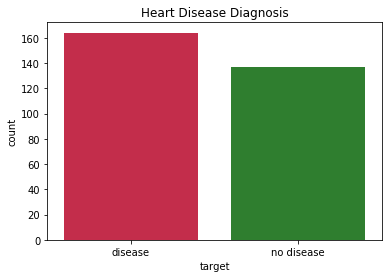

In [12]:
# Target 
# Dataset nearly evenly balanced for disease vs no disease 
# 0: 138/301 = 46%
# 1: 165/301 = 54%


plt.title('Heart Disease Diagnosis')
ax = sns.countplot(df['target'],palette=('crimson','forestgreen'))
ax.figure.savefig('01_target.png')

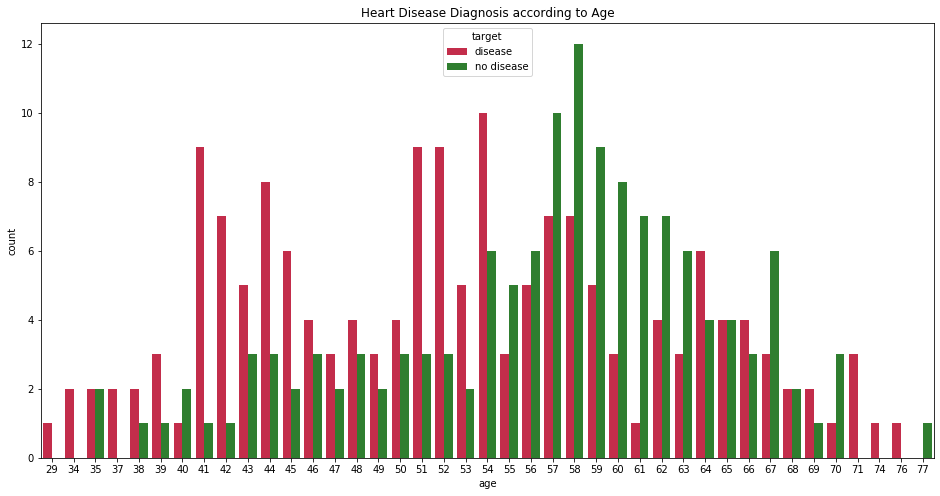

In [13]:
# Target vs Age
# Heart Disease prevalent in ages 40s to 50s

plt.figure(figsize=(16,8))
plt.title('Heart Disease Diagnosis according to Age')
ax = sns.countplot(df['age'],hue=df['target'],palette=('crimson','forestgreen'))
ax.figure.savefig('02_age vs target.png')

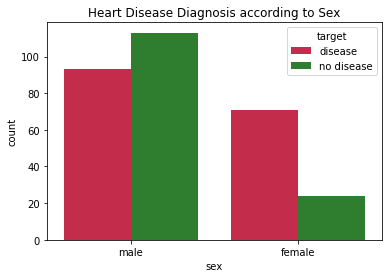

In [14]:
# Target vs Sex
# Females: 95/301 = 32%
# Males: 206/301 = 68%

# More females appear to have heart disease than no disease
# Amount of Males with disease and no disease is close

plt.title('Heart Disease Diagnosis according to Sex')
ax = sns.countplot(df['sex'],hue=df['target'],palette=('crimson','forestgreen'))
ax.figure.savefig('03_sex vs target.png')

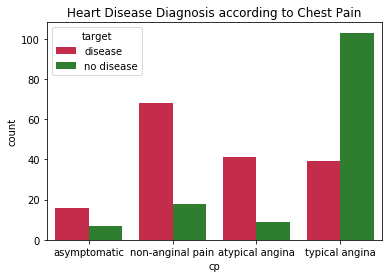

In [15]:
# Target vs cp KEEP

plt.title('Heart Disease Diagnosis according to Chest Pain')
ax = sns.countplot(df['cp'],hue=df['target'],palette=('crimson','forestgreen'))
ax.figure.savefig('04_cp vs target.png')

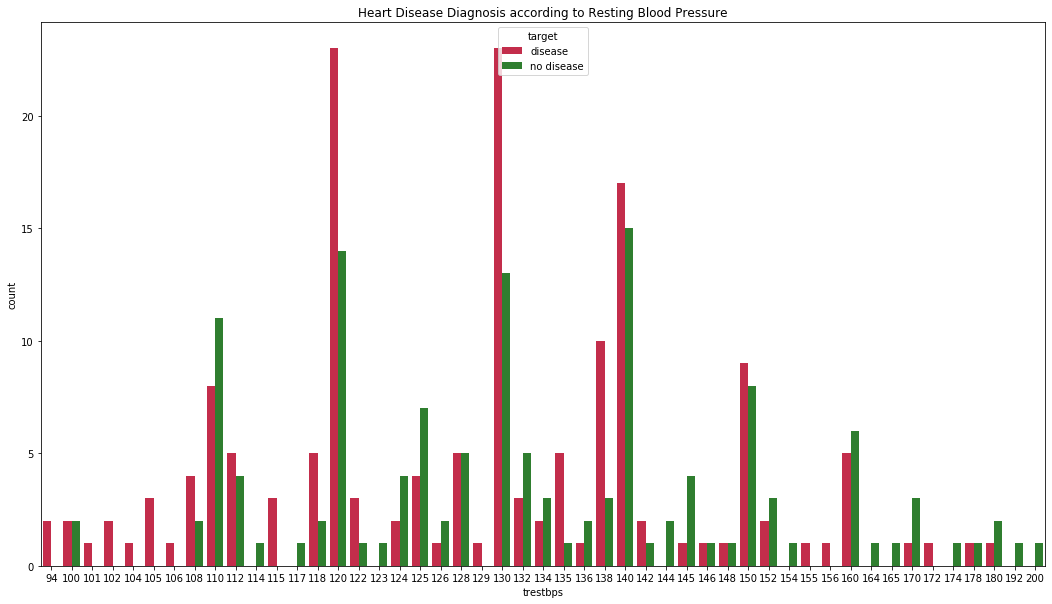

In [16]:
# Target vs Resting Blood Pressure KEEP
# Ideal Blood Pressure range is 90-120; instances of disease low in this range
# Above 120, chances of disease increase sharply 
# Average Blood Pressure is around 130

plt.figure(figsize=(18,10))
plt.title('Heart Disease Diagnosis according to Resting Blood Pressure')
ax = sns.countplot(df['trestbps'],hue=df['target'],palette=('crimson','forestgreen'))
ax.figure.savefig('05_trestbps vs target.png')

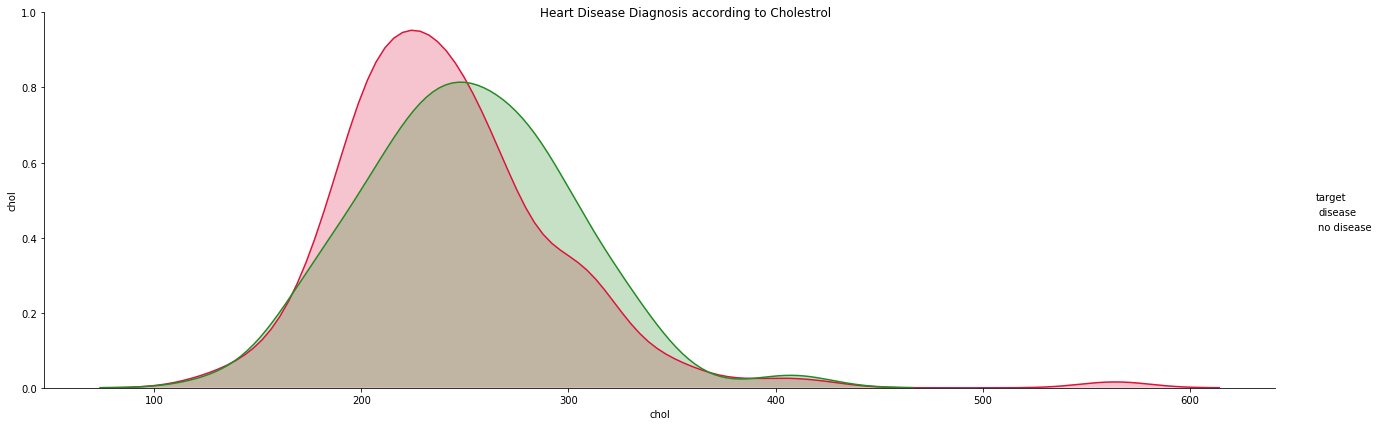

In [17]:
# Target vs Cholestrol
# Average cholestrol is around 234

#plt.figure(figsize=(10,20))
#plt.title('Heart Disease Diagnosis according to Cholestrol')
#plt.xlabel('chol')
#plt.ylabel('count')
#plt.hist(df['chol'],bins=50,alpha=0.5,ec='black')
#sns.countplot(df['chol'],hue=df['target'],palette=('crimson','forestgreen'))

#Plot the KDE (Kernel Density Estimation) of chol for disease and not-disease
#https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot
g = sns.pairplot(df,hue='target',vars=['chol'],palette=('crimson','forestgreen'),diag_kind='kde',aspect=3,height=6)
g.fig.suptitle('Heart Disease Diagnosis according to Cholestrol')
plt.show(g)
#g.savefig('06_chol vs target.png')

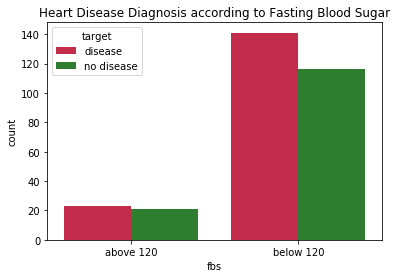

In [18]:
# Target vs Fasting Blood Sugar
# Majority is below 120 

plt.title('Heart Disease Diagnosis according to Fasting Blood Sugar')
ax = sns.countplot(df['fbs'],hue=df['target'],palette=('crimson','forestgreen'))
ax.figure.savefig('07_fbs vs target.png')

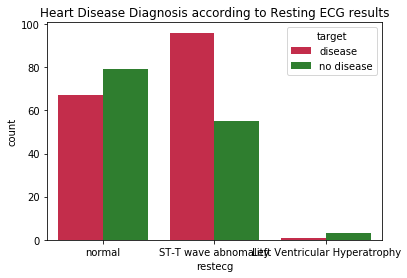

In [19]:
# Target vs Resting Electrocardiographic results 

plt.title('Heart Disease Diagnosis according to Resting ECG results')
plt.rcParams["xtick.labelsize"] = 20
ax = sns.countplot(df['restecg'],hue=df['target'],palette=('crimson','forestgreen'))
ax.figure.savefig('08_restecg vs target.png')

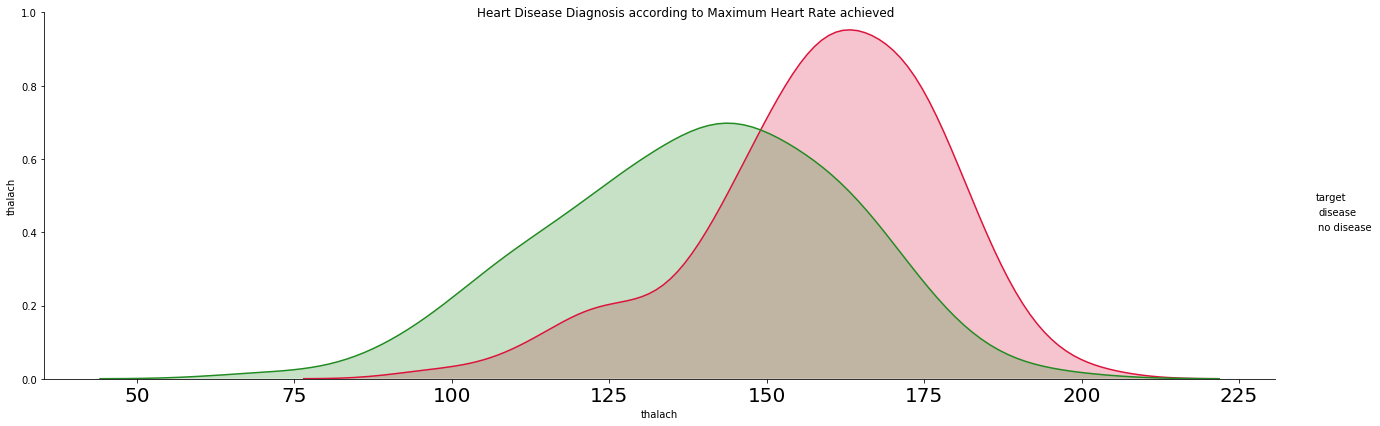

In [20]:
# Target vs Maximum Heart Rate achieved
# Greater the heart rate, greater the chance of disease

#plt.figure(figsize=(30,20))
#sns.countplot(df['thalach'],hue=df['target'],palette=('crimson','forestgreen'))
#plt.title('Heart Disease Diagnosis according to Maximum Heart Rate achieved')
#plt.xlabel('thalach')
#plt.ylabel('frequency count')
#plt.hist(df['thalach'],bins=50,alpha=0.5,ec='black')

g = sns.pairplot(df,hue='target',vars=['thalach'],palette=('crimson','forestgreen'),diag_kind='kde',aspect=3,height=6)
g.fig.suptitle('Heart Disease Diagnosis according to Maximum Heart Rate achieved')
plt.show(g)
g.savefig('09_thalach vs target.png')

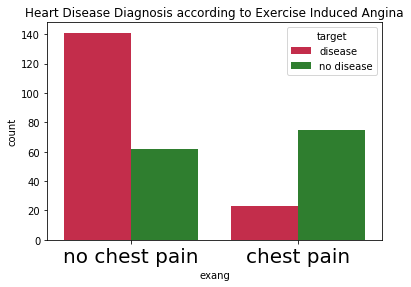

In [21]:
# Target vs Exercise Induced Angina

plt.title('Heart Disease Diagnosis according to Exercise Induced Angina')
sns.countplot(df['exang'],hue=df['target'],palette=('crimson','forestgreen'))
ax.figure.savefig('08_restecg vs target.png')

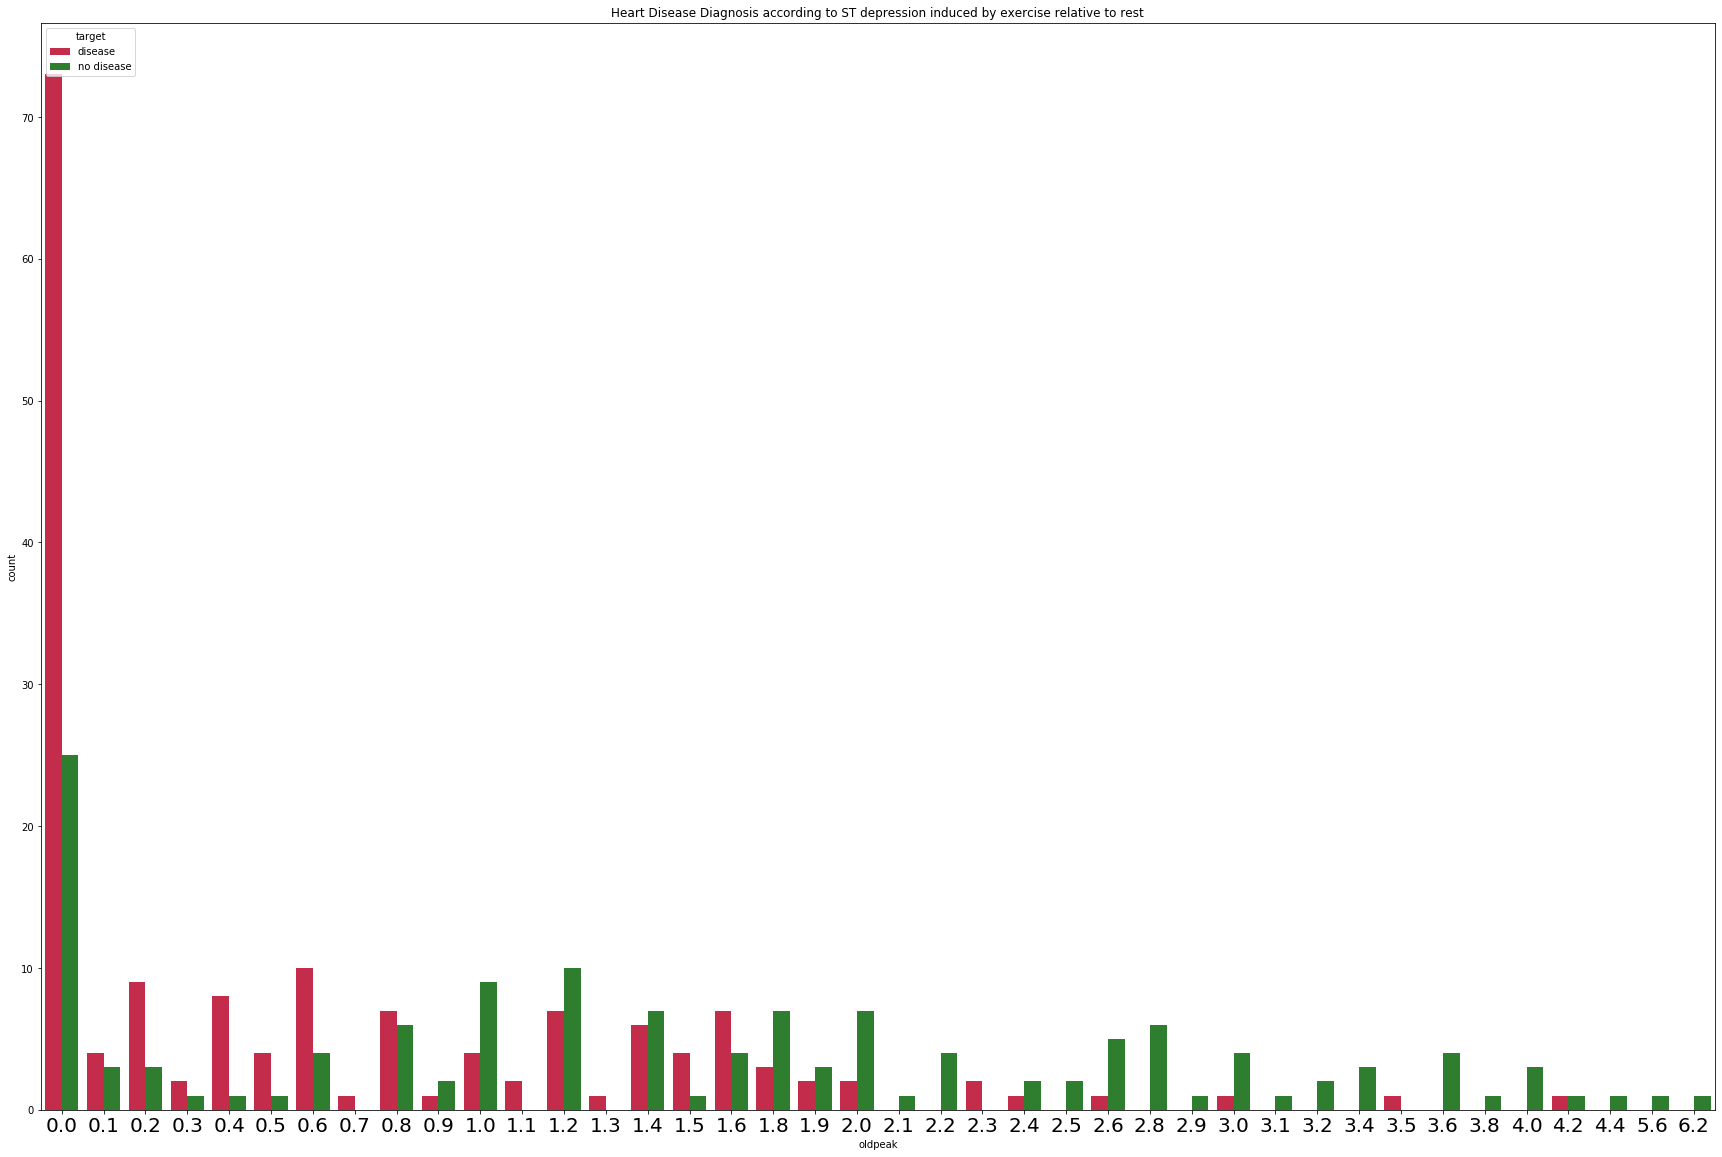

In [22]:
# Target vs ST depression induced by exercise relative to rest
# Majority/majority is close to 0

plt.figure(figsize=(30,20))
plt.title('Heart Disease Diagnosis according to ST depression induced by exercise relative to rest')
ax = sns.countplot(df['oldpeak'],hue=df['target'],palette=('crimson','forestgreen'))
ax.figure.savefig('11_oldpeak vs target.png')

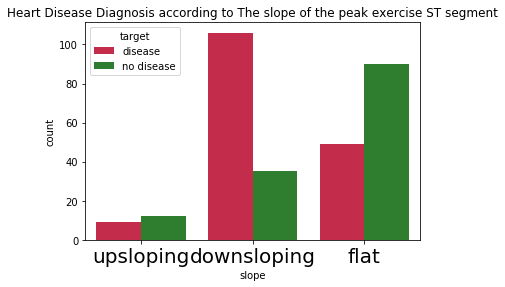

In [23]:
# Target vs The slope of the peak exercise ST segment
# Downsloping slope contributes significatly to disease

plt.title('Heart Disease Diagnosis according to The slope of the peak exercise ST segment')
ax = sns.countplot(df['slope'],hue=df['target'],palette=('crimson','forestgreen'))
ax.figure.savefig('12_slope vs target.png')

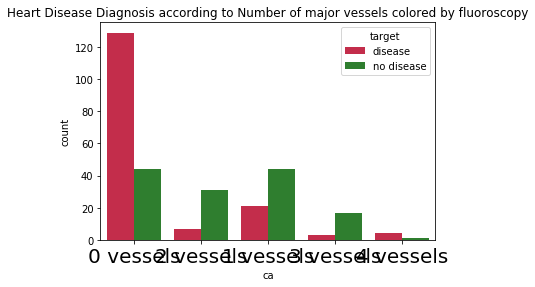

In [24]:
# Target vs Number of major vessels colored by fluoroscopy

plt.title('Heart Disease Diagnosis according to Number of major vessels colored by fluoroscopy')
ax = sns.countplot(df['ca'],hue=df['target'],palette=('crimson','forestgreen'))
ax.figure.savefig('13_ca vs target.png')

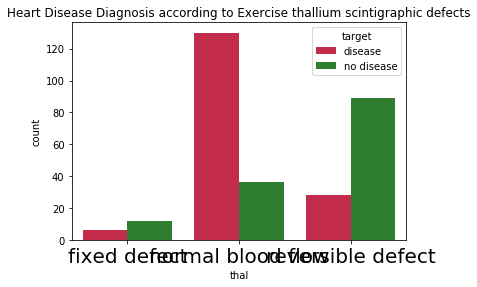

In [25]:
# Target vs Exercise thallium scintigraphic defects

plt.title('Heart Disease Diagnosis according to Exercise thallium scintigraphic defects')
ax = sns.countplot(df['thal'],hue=df['target'],palette=('crimson','forestgreen'))
#ax.set_xlim(len(ax)+1, -1)
plt.rcParams["xtick.labelsize"] = 4
ax.figure.savefig('14_thal vs target.png')

(13.2, -0.2)

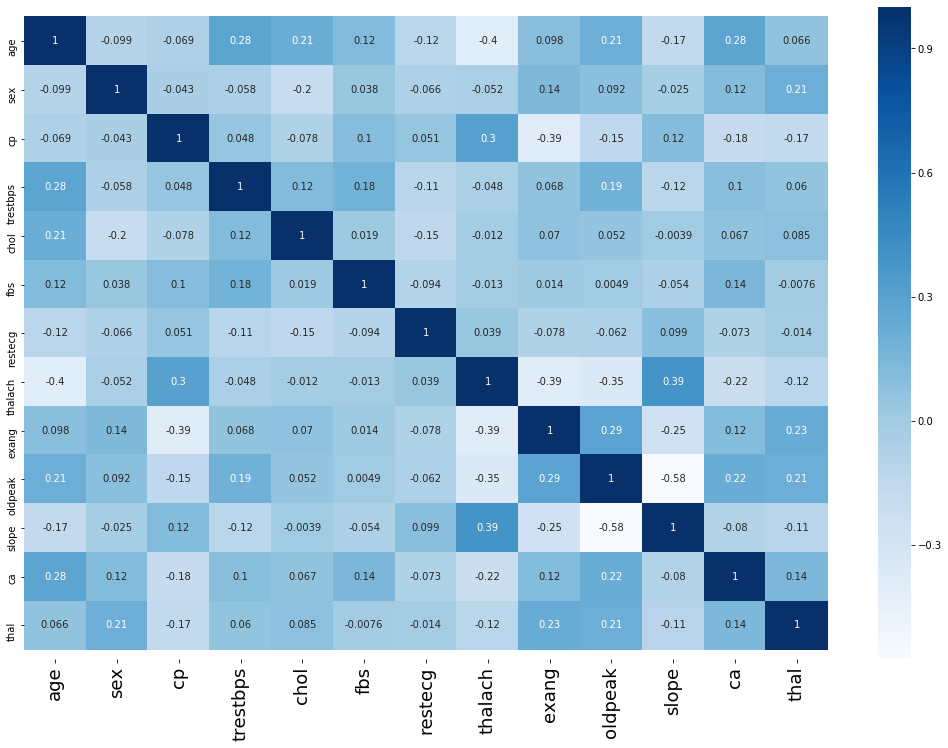

In [29]:
#plt.figure(figsize=(30,20))
plt.subplots(figsize=(18,12))

result = data.drop('target',axis=1)
corr = result.corr()
plt.rcParams["xtick.labelsize"] = 19
heatmap_f = sns.heatmap(corr,annot=True,cmap='Blues')
heatmap_f.set_ylim(len(corr)+0.2, -0.2)

In [81]:
heatmap_f.figure.savefig('heatmap_figure.png')